# 785 Final Project Result Visualizations

In [42]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import os
import json

data_dir = "~/autosubs/final_data/"
experiment_list = [folder for folder in os.listdir(os.path.expanduser(data_dir)) if not folder.startswith(".") and not folder.endswith("csv") and not folder.endswith(".png")]
exp_to_progress = dict()
exp_to_results = dict()
columns_needed = ['train_loss', 'eval_gr_dist', 'training_iteration']
FAIR_wav2vec_result = 'FAIR_wav2vec_validation_log.csv'

In [43]:
print("Experiments: ")
print(experiment_list)
print("\nVisualizations using columns: ")
print(columns_needed)

Experiments: 
['knnw_no-transfer_wav2vec_nospec_dist28', 'knnw_transfer-wsj_no-wav_no-spec_dist15', 'knnw_transfer-wsj_wav2vec_no-spec_dist24', 'knnw_transfer-wsj_no-wav_spec7_dist15pt9', 'knnw_no-transfer_no-wav_spec47_dist26', 'knnw_transfer-wsj_spec17_dist17', 'knnw_transfer-wsj_spec47_dist17', 'knnw_transfer-wsj_no-wav_no-spec_no-dropout_dist28']

Visualizations using columns: 
['train_loss', 'eval_gr_dist', 'training_iteration']


In [44]:
exp_file_name_to_clear_name =  {'knnw_transfer-wsj_spec17_dist17': 'Transfer + SpecAug @ 17',
                                 'knnw_transfer-wsj_no-wav_spec7_dist15pt9': 'Transfer + SpecAug @ 7',
                                 'knnw_no-transfer_wav2vec_nospec_dist28': 'No Transfer + Wav2Vec',
                                 'knnw_transfer-wsj_wav2vec_no-spec_dist24': 'Transfer + Wav2Vec',
                                 'knnw_no-transfer_no-wav_spec47_dist26': 'No Transfer + SpecAug @ 47',
                                 'knnw_transfer-wsj_no-wav_no-spec_dist15': 'Transfer',
                                 'knnw_transfer-wsj_no-wav_no-spec_no-dropout_dist28': 'Transfer + No Dropout',
                                 'knnw_transfer-wsj_spec47_dist17': 'Transfer + SpecAug @ 47'
                               }

In [45]:
exp_to_progress['FAIR wav2vec'] = pd.read_csv(os.path.expanduser(data_dir) + './FAIR_wav2vec_validation_log.csv')
exp_to_progress['FAIR wav2vec']['epoch'] = exp_to_progress['FAIR wav2vec']['epoch'] + 1

In [46]:
# load experiments into dataframes
for exp in experiment_list:
    path1 = os.path.expanduser(data_dir + exp + "/progress.csv")
    path2 = os.path.expanduser(data_dir + exp + "/result.json")
    exp_to_progress[exp_file_name_to_clear_name[exp]] = pd.read_csv(path1)[columns_needed]
    exp_to_progress[exp_file_name_to_clear_name[exp]]['eval_dist'] = exp_to_progress[exp_file_name_to_clear_name[exp]]['eval_gr_dist']
    exp_to_progress[exp_file_name_to_clear_name[exp]]['epoch'] = exp_to_progress[exp_file_name_to_clear_name[exp]]['training_iteration']
    exp_to_progress[exp_file_name_to_clear_name[exp]] = exp_to_progress[exp_file_name_to_clear_name[exp]].drop(columns=['training_iteration', 'eval_gr_dist'])

In [47]:
for exp_name, df in exp_to_progress.items():
    epochs = df['epoch'].values
    eval_lev_dist = df['eval_dist'].values
    print(f"{exp_name} - Best Evaluation Levenshtein Distance: {min(eval_lev_dist)}")

FAIR wav2vec - Best Evaluation Levenshtein Distance: 6.980544999999999
No Transfer + Wav2Vec - Best Evaluation Levenshtein Distance: 28.155642023346307
Transfer - Best Evaluation Levenshtein Distance: 15.517509727626463
Transfer + Wav2Vec - Best Evaluation Levenshtein Distance: 24.591439688715955
Transfer + SpecAug @ 7 - Best Evaluation Levenshtein Distance: 15.038910505836576
No Transfer + SpecAug @ 47 - Best Evaluation Levenshtein Distance: 26.785992217898837
Transfer + SpecAug @ 17 - Best Evaluation Levenshtein Distance: 17.587548638132297
Transfer + SpecAug @ 47 - Best Evaluation Levenshtein Distance: 17.86770428015564
Transfer + No Dropout - Best Evaluation Levenshtein Distance: 27.097276264591443


In [62]:
def plot_train_loss():
    fig = plt.figure(figsize=(15, 8))
    plt.title("Train Loss (Cross-Entropy)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    MAX_X_TRAIN = 250
    plt.xlim(0, MAX_X_TRAIN)
    plt.ylim(0, 0.75)

    for exp_name, df in exp_to_progress.items():
        if exp_name.startswith("FAIR"):
            continue
        epochs = exp_to_progress[exp_name]['epoch']
        train_loss = exp_to_progress[exp_name]['train_loss']
        plt.plot(epochs, train_loss, label=exp_name, linewidth=1)
    
    leg = plt.legend(loc='best', ncol=3, mode="expand", shadow=True, fancybox=True)
    plt.savefig("./final_data/train_loss.png")
    plt.show()
    
def plot_eval_dist(exclude_FAIR=True):
    fig = plt.figure(figsize=(15, 8))
    plt.title("Evaluation Levenshtein Distance")
    plt.xlabel("Epoch")
    plt.ylabel("Distance")
    MAX_X_EVAL = 250
    plt.xlim(0, MAX_X_EVAL)
    plt.ylim(0, 150)

    for exp_name, df in exp_to_progress.items():
        if exp_name.startswith("FAIR") and exclude_FAIR:
            continue
        epochs = exp_to_progress[exp_name]['epoch'].values
        eval_lev_dist = exp_to_progress[exp_name]['eval_dist'].values
        plt.plot(epochs, eval_lev_dist, label=exp_name, linewidth=1)

    leg = plt.legend(loc='best', ncol=3, mode="expand", shadow=True, fancybox=True)
    plt.savefig("./final_data/eval_lev_dist.png")
    plt.show()

In [58]:
def plot_eval_with_FAIR():
    fig = plt.figure(figsize=(15, 8))
    plt.title("Evaluation Levenshtein Distance")
    plt.xlabel("Epoch")
    plt.ylabel("Distance")
    MAX_X_EVAL = 250
    plt.xlim(0, MAX_X_EVAL)
    plt.ylim(0, 150)

    for exp_name, df in exp_to_progress.items():
        epochs = exp_to_progress[exp_name]['epoch'].values
        eval_lev_dist = exp_to_progress[exp_name]['eval_dist'].values
        plt.plot(epochs, eval_lev_dist, label=exp_name, linewidth=1)

    leg = plt.legend(loc='best', ncol=3, mode="expand", shadow=True, fancybox=True)
    plt.savefig("./final_data/eval_lev_dist_with_FAIR.png")
    plt.show()

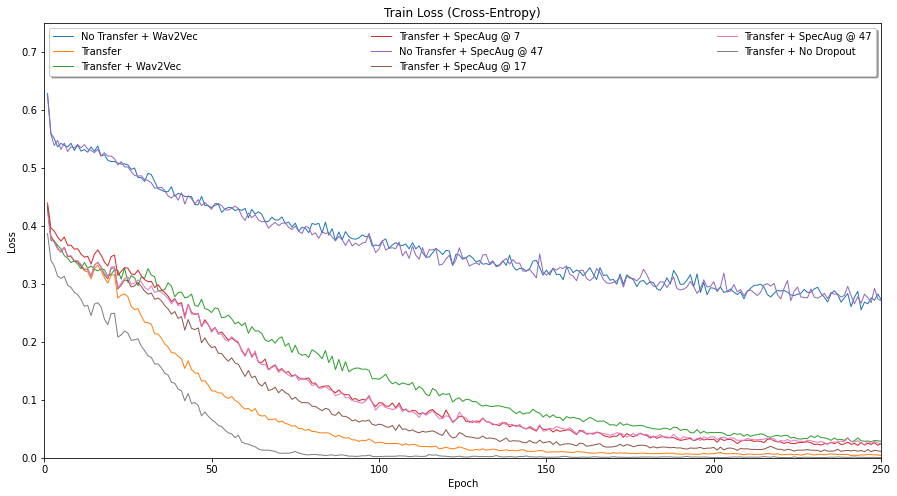

In [66]:
plot_train_loss()

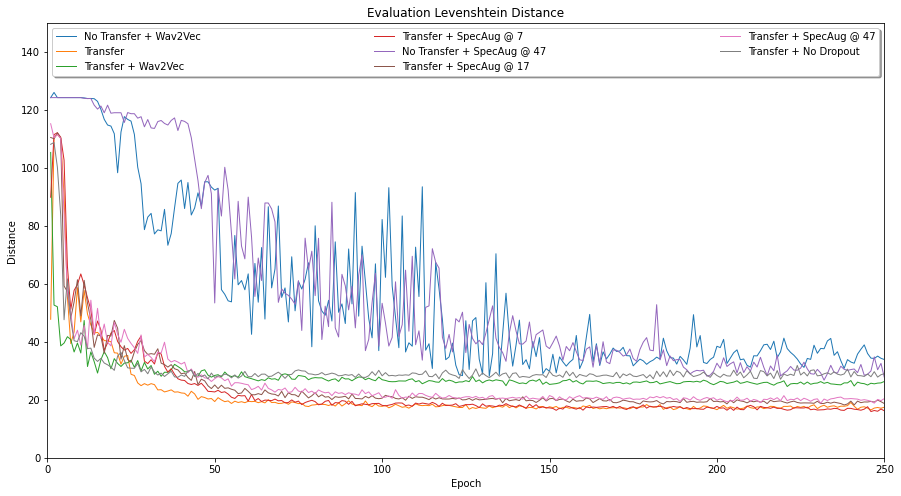

In [65]:
plot_eval_dist(exclude_FAIR=True)

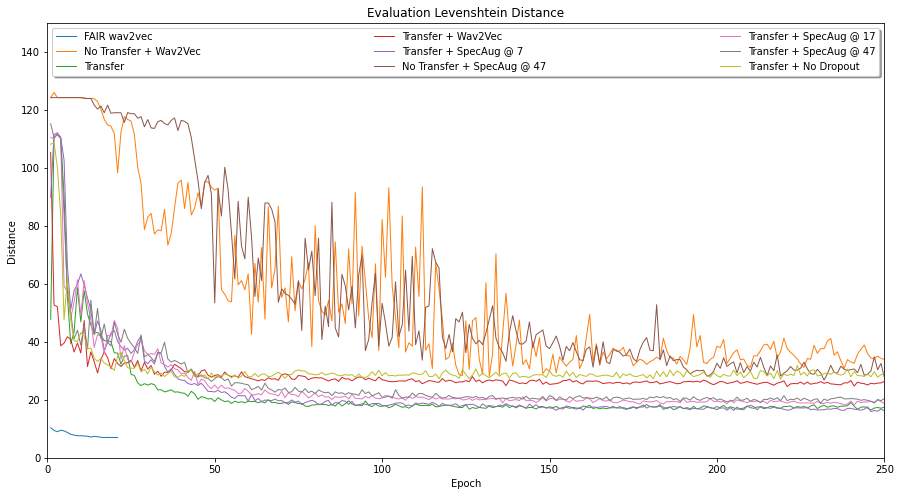

In [64]:
plot_eval_dist(exclude_FAIR=False)